In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
# file = '/Users/theoares/lqcd/npr_momfrac/testing/output/cl3_16_48_b6p1_m0p2450_14489/cfg200.h5'
# f = h5py.File(file, 'r')
# propprime_p2222 = f['propprime/p2222/cfg200'][()]
# prop_p2222 = f['prop/p2222/cfg200'][()]
# delta = prop_p2222 - propprime_p2222
# scale = np.abs(prop_p2222[0, 0, 0, 0])
# print(delta / scale) # first order entries are of size 10^4

In [3]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 13561
base = './output/' + cfgbase + '_' + str(job_num)

# base = './examples/analysis_EXAMPLE.py'
props, threepts = analysis.readfile(base)    # C should be a dictionary whose keys are the momentum slices.
V = analysis.get_hypervolume()

In [4]:
for p in props:
    props[p]= props[p] / V    # didn't divide props by V in qlua

In [5]:
mom_list = analysis.get_mom_list()
props_boot = analysis.bootstrap(props)
threept_boot = analysis.bootstrap(threepts)

In [6]:
props_inv = analysis.invert_prop(props_boot)

In [7]:
Γ = analysis.amputate(props_inv, threept_boot)

In [8]:
Zq = analysis.quark_renorm(props_inv)

In [9]:
Zq

{'p2222': array([[ 159.77286  +0.j,  -85.28112  +0.j,   -1.2296455+0.j, ...,
           16.822342 +0.j, -148.29213  +0.j,  225.1449   +0.j],
        [  99.57978  +0.j,  139.22258  +0.j,   68.11702  +0.j, ...,
          159.77286  +0.j,    2.6862242+0.j,   16.822342 +0.j],
        [   2.6862242+0.j,   -1.2296455+0.j, -135.95161  +0.j, ...,
          -85.28112  +0.j, -148.29213  +0.j,   24.821848 +0.j],
        ...,
        [ 175.54654  +0.j,   24.821848 +0.j,   69.98167  +0.j, ...,
          101.93979  +0.j,   69.98167  +0.j,  139.22258  +0.j],
        [ -94.62511  +0.j,   16.822342 +0.j,   71.39644  +0.j, ...,
           77.025566 +0.j, -135.95161  +0.j,  159.77286  +0.j],
        [  16.822342 +0.j,   36.956703 +0.j,  135.84178  +0.j, ...,
           24.821848 +0.j,  101.93979  +0.j,  -57.44063  +0.j]],
       dtype=complex64),
 'p2224': array([[ 205.64072  +0.j,  211.43039  +0.j,   64.885025 +0.j, ...,
            6.2178535+0.j, -111.52333  +0.j,  -58.222614 +0.j],
        [  99.34856

In [10]:
Γ_B, Γ_B_inv = analysis.born_term()

In [11]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)

In [12]:
μ, σ = analysis.get_statistics_Z(Z)

<IPython.core.display.Javascript object>


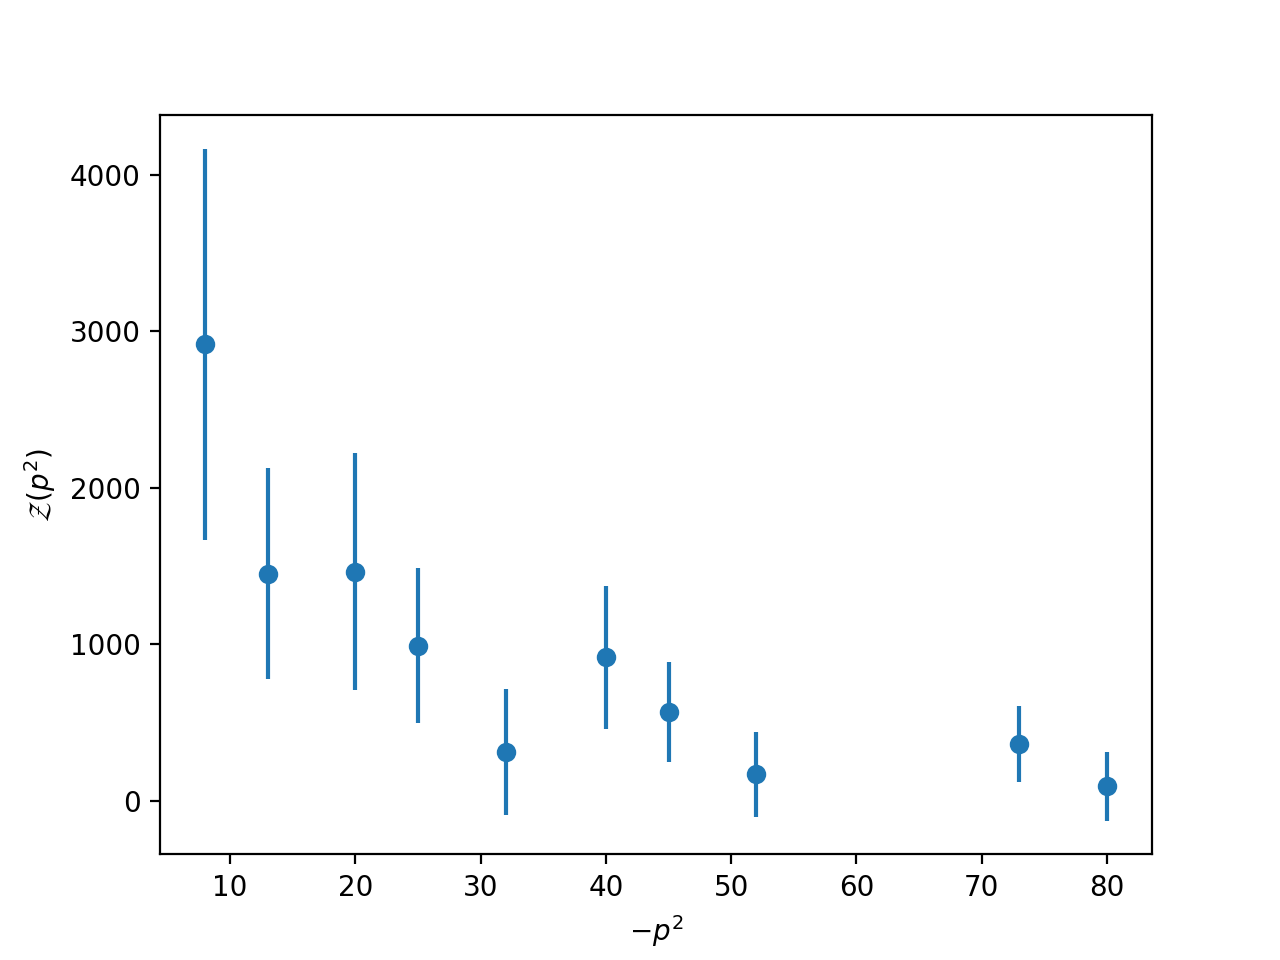

In [13]:
p_squared = [np.abs(analysis.square(p)) for p in mom_list]
μ_list = [μ[analysis.plist_to_string(p)] for p in mom_list]
σ_list = [σ[analysis.plist_to_string(p)] for p in mom_list]
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$-p^2$')
plt.show()

In [14]:
V

196608